

The following assignment consists of:
1. Implementation of elementary row operations : Scaling, Replacement, Interchange
2. Using the defined functions to find the answer of a system
3. Calculation of the determinant
4. EXTRA - Plotting the answer


### 0. Libraries

In [63]:
import time
import matplotlib.pyplot as plt
import numpy as np


## 1. Implementation of elementary row operations
Implement these operations from scratch, for they will be used for upcoming sections


### 1.1. Scaling

In [64]:
def op_scale(A, R, C):
    #CHNAGE THIS PART
    """ Multiply the R-th row of the matrix A by C, and return the new matrix """
    scaled_A = np.copy(A)
    scaled_A[R-1] *= C
    return scaled_A 

In [65]:
#e.g.
# DO NOT CHANGE THIS CELL
A = np.array([[10, 3, 2, 1],
               [ 1, 0, 4, 2],
               [ 7, 5,-1, 9],
               [-6,-7, 8,-4]])
A = op_scale(A, 2, 3)
print(A)

 
"""
 Expected_output = [[10, 3, 2, 1],
                    [ 3, 0,12, 6],
                    [ 7, 5,-1, 9],
                    [-6,-7, 8,-4]]
"""


[[10  3  2  1]
 [ 3  0 12  6]
 [ 7  5 -1  9]
 [-6 -7  8 -4]]


'\n Expected_output = [[10, 3, 2, 1],\n                    [ 3, 0,12, 6],\n                    [ 7, 5,-1, 9],\n                    [-6,-7, 8,-4]]\n'

### 1.2. Interchange

In [66]:
def op_interchange(A, R1, R2):
    #CHNAGE THIS PART
    """ Replace R1-th and R2-th rows in the matrix A, and return the new matrix """
    interchanged_A = np.copy(A)
    interchanged_A[R1-1] = A[R2-1]
    interchanged_A[R2-1] = A[R1-1]
    return interchanged_A
    

In [67]:
# e.g.
# DO NOT CHANGE THIS CELL
A = op_interchange(A, 3, 4)
print(A)
"""
Expected_output = [[10, 3, 2, 1],
                    [ 3, 0,12, 6],
                    [-6,-7, 8,-4],
                    [ 7, 5,-1, 9]]
"""

[[10  3  2  1]
 [ 3  0 12  6]
 [-6 -7  8 -4]
 [ 7  5 -1  9]]


'\nExpected_output = [[10, 3, 2, 1],\n                    [ 3, 0,12, 6],\n                    [-6,-7, 8,-4],\n                    [ 7, 5,-1, 9]]\n'

### 1.3. Replace

In [68]:
def op_replace(A, R1, R2 , C):
    #CHNAGE THIS PART
    """ Replace the R2-th row with (R2 + C*R1), and return the new matrix """
    replaced_A = A.astype(float)
    replaced_A[R2-1,] += C*replaced_A[R1-1,]
    return replaced_A

In [69]:
# e.g.
# DO NOT CHANGE THIS CELL
A = op_replace(A, 2, 1, 4)
print(A)
"""
Expected_output = [[22, 3,50,25],
                   [ 3, 0,12, 6],
                   [-6,-7, 8,-4],
                   [ 7, 5,-1, 9]]
"""


[[22.  3. 50. 25.]
 [ 3.  0. 12.  6.]
 [-6. -7.  8. -4.]
 [ 7.  5. -1.  9.]]


'\nExpected_output = [[22, 3,50,25],\n                   [ 3, 0,12, 6],\n                   [-6,-7, 8,-4],\n                   [ 7, 5,-1, 9]]\n'

## 2. Solving a system of linear equations
In this part, you are required to use the functions defined in the previous part to find the solution to a linear system of equations.


### 2.1. Row Echelon Form

In [70]:
def zeroation(A, row, column, n): #to make an echelon matrix we should make all entries bellow pivots 0
    i = row + 1
    A = A.astype(float)
    while i < n :
        if A[i, column] != 0:
            x = A[i,column] / A[row, column]
            A = op_replace(A,row+1,i+1,-x)
            A[i,column] = 0
            #print (A)
        i += 1
    return A

def row_echelon(A):
    #CHNAGE THIS PART
    """ Define an algorithm to find the row-echelon form of the input matrix, row-echelon form of a matrix is not unique, so any true row-echelon form is acceptable."""
    nrows = len(A)
    ncols = len(A[0])
    pivot_list = []
    cnt=0
    lead = 0
    for r in range(nrows):
        if lead >= ncols:
            return pivot_list,A,cnt
        i = r
        while A[i, lead] == 0:
            i += 1
            if i == nrows:
                i = r
                lead += 1
                if lead == ncols:
                    return pivot_list,A,cnt
        A = op_interchange(A,r+1,i+1)
        cnt+=1
        A=zeroation(A,i,r,nrows)
        pivot_list.append((r,lead))
        lead += 1
    #print(pivot_list)
    #print(A)    
    return pivot_list,A,cnt


In [71]:
#e.g.
# DO NOT CHANGE THIS CELL
B = np.array([[ 1, 2, 3, 4],
              [ 5, 6, 7, 8],
              [ 9,10,11,12]])
print(row_echelon(B))

""""
Notice that any true row-echelon form is acceptable. An example is given below:
([[ 1, 2, 3, 4],
  [ 0,-4,-8,-12],
  [ 0, 0, 0, 0]])
"""


([(0, 0), (1, 1)], array([[  1.,   2.,   3.,   4.],
       [  0.,  -4.,  -8., -12.],
       [  0.,   0.,   0.,   0.]]), 2)


'"\nNotice that any true row-echelon form is acceptable. An example is given below:\n([[ 1, 2, 3, 4],\n  [ 0,-4,-8,-12],\n  [ 0, 0, 0, 0]])\n'

### 2.2. Reduce Row Echelon Form

In [72]:
def up_zeroation(A, row, column, n): #to make a reduced form echelon we shold make the pivots 1 and all upper entries 0
    i = row - 1
    A = A.astype(float)
    while i >= 0:
         if A[i, column] != 0:
            x = A[i,column] / A[row, column]
            A = op_replace(A,row+1,i+1,-x)
            A[i,column] = 0
         i -= 1
    A[row,] /= A[row,column]
    #print(A)
    return A


def reduce(A):
    #CHNAGE THIS PART
    """ Define an algorithm to find the reduced-row-echelon form of the input matrix 
        ATTENTION : Assume  the input matrix is already in row-echelon form!"""
    pivot_list = []
    nrows = len(A)
    pivot_list , B , cnt= row_echelon(A)
    #print(pivot_list)
    for pivot in pivot_list :
        A=up_zeroation(A,pivot[0],pivot[1],nrows)
    return A    

    
    

In [73]:
# e.g.
# DO NOT CHANGE THIS CELL
B = np.array([[ 1, 2, 3, 4],
              [ 0,-4,-8,-12],
              [ 0, 0, 0, 0]])
print(reduce(B))
"""
Expected_output = [[ 1, 0,-1,-2],
                   [ 0, 1, 2, 3],
                   [ 0, 0, 0, 0]]
"""

[[ 1.  0. -1. -2.]
 [-0.  1.  2.  3.]
 [ 0.  0.  0.  0.]]


'\nExpected_output = [[ 1, 0,-1,-2],\n                   [ 0, 1, 2, 3],\n                   [ 0, 0, 0, 0]]\n'

### 2.3. Existence of the Solution
Based on the reduced form of the augmented matrix and prior to finding the answer, make sure the solution exists!

In [74]:
def is_consistent(A):
    #CHNAGE THIS PART
    """ Make sure the system has a solution or not (check if it has a row like : 00...0b)"""
    nrows = len(A)
    ncols = len(A[0])
    b = A[nrows-1,ncols-1]
    for entry in A[nrows-1][:-1]: #check  if all entries in the last row except the laast onr are 0 or not
        if entry !=0 and b!=0:
            return False        

    return True        


In [75]:
#e.g.
# DO NOT CHANGE THIS CELL
C=is_consistent(B)
print(C)
"""
expected_output: true
"""

True


'\nexpected_output: true\n'

### 2.4. Uniqueness of the Solution
Based on prior information, make sure whether the solution is unique or not!

In [76]:
def is_unique(A):
    #CHNAGE THIS PART
    """ Address the uniqueness of solution (num of pivots == num of cols-1)"""
    pivot_list = []
    nrows = len(A)
    ncols = len(A[0])
    pivot_list , B , cnt = row_echelon(A)
    if ncols-1 != len(pivot_list) :
        return False
    for i in range(ncols-1):
        if i not in pivot_list[1]:
            return False
    return True
    

In [77]:
#e.g.
# DO NOT CHANGE THIS CELL
C=is_unique(B)
print(C)
"""
expected_output: false
"""

False


'\nexpected_output: false\n'

### 2.5. Finding (just a) Solution
If the system has a solution, find and return it.
If the system has infinite solutions, return only one solution and double-check it with the original system defintion.

In [79]:
def double_check(solution,Aug):
    nrows , ncols = Aug.shape
    dot_prdct = np.dot(Aug[:, :-1],solution)
    return np.allclose(dot_prdct,Aug[:, -1])

def solve(A):
    #CHNAGE THIS PART
    """ Find the solution, A is the augmented matrix """
    pivot_list , A ,cnt= row_echelon(A)
    A=reduce(A)
    if is_consistent(A) == False :
        return
    nrows = len(A)
    ncols = len(A[0])
    solution = [0] * (ncols-1)
    pivot_col = [pivot[1] for pivot in pivot_list]
    for i in range(ncols-1):
        if i not in pivot_col :
            solution[i] = 0 #free var
    
    for i,pivot_col in pivot_list:
        solution[pivot_col] = A[i][-1]
        for j in range(pivot_col):
            solution[pivot_col] -= A[i,j] * solution[j]

    for i in range (len(solution)):
        print(f"x[{i+1}] : {solution[i]}")
            
    return solution,double_check(solution,A)       



B = np.array([[ 1, 2, 3, 4],
              [ 5, 6, 7, 8],
              [ 9,10,11,12]])
B,flag = solve(B)
print(B,flag)
#print(double_check(solve(B),B))


x[1] : -2.0
x[2] : 3.0
x[3] : 0
[-2.0, 3.0, 0] True


## 3. Determinant
In this section, you are requiered to find the determinant of a matrix in two different ways and compare them in the sense of computation complexity.


### 3.1. Recursive algorithm
Implement a recursive algorithm to compute the determinant of a N*N matrix, using expansion with respect to a column or a row.


In [ ]:
def cofactor(A,i,j):
    C = np.delete(np.delete(A,i,axis=0),j,axis=1)
    sign=(-1)**(i+j)
    #print(C)
    return sign*det_recursive(C)

def det_recursive(A):
    #CHNAGE THIS PART
    """ Find the determinant of the matrix A, make sure it is a square matrix and raise an error otherwise """
    nrows = len(A)
    ncols = len(A[0])
    A = np.array(A)
    det = 0
    if nrows!= ncols :
        return False
    if nrows == 1 :
        return A[0,0]
    if nrows == 2 :
        return A[0,0]*A[1,1] - A[1,0]*A[0,1]
    for i in range(ncols):
        det += A[0,i]*cofactor(A,0,i)
    return det    
    

    

In [ ]:
#e.g.
# DO NOT CHANGE THIS CELL
Matrix = np.array([[ 5, 7,-2, 1],
                   [-1, 5,-3, 0],
                   [ 3,11,-2,-9],
                   [ 8, 0, 4,-1]])
print(det_recursive(Matrix))
"""
expected_output = 190
"""

190


'\nexpected_output = 190\n'

#### 3.1.1. Test your algorithm
Measure the computation time of you recursive algorithm by testing it N*N matrixes, N= 2, 3, 4, 5, 6, 7

In [ ]:
# Testing
M2 = [[4,5],[2,3]]
M3 = [[3,2,1],[2,2,2],[0,3,1]]
M4 = np.random.rand(4,4)
M5 = np.random.rand(5,5)
M6 = np.random.rand(6,6)
M7 = np.random.rand(7,7)

# define the rest of the matrixes up to 7*7, you may use random number generators
elapsed_time_recursive = []
matrices = [M2, M3, M4, M5, M6, M7]
matrix_sizes = [2, 3, 4, 5, 6, 7]

for matrix, size in zip(matrices, matrix_sizes):

    start_time = time.time()
    det_recursive(matrix)
    end_time = time.time()
    elapsed_time_recursive.append(end_time - start_time)

for i, size in enumerate(matrix_sizes):
    print(f"Time Elapsed for row echelon computation of determinant of M{i+2}: {elapsed_time_recursive[i]}")
    
# Do the same for the rest of the matrices up to 7*7


Time Elapsed for row echelon computation of determinant of M2: 0.0
Time Elapsed for row echelon computation of determinant of M3: 0.0
Time Elapsed for row echelon computation of determinant of M4: 0.0
Time Elapsed for row echelon computation of determinant of M5: 0.0020003318786621094
Time Elapsed for row echelon computation of determinant of M6: 0.0060198307037353516
Time Elapsed for row echelon computation of determinant of M7: 0.03705024719238281


### 3.2. Row Echelon
Use the function defined in part 1 to find the row echelon form of the matrix and calculate the determinant

#### ATTENTION: BEWARE OF THE IMPACT OF EACH OPERATION ON THE DETERMINANT!

In [ ]:
def det_row_echelon(A):
    #CHNAGE THIS PART
    """ Find the determinant of the matrix A, make sure it is a square matrix and raise error otherwise """
    nrows = len(A)
    ncols = len(A[0])
    A = np.array(A)
    tmp=1
    cnt=0
    if nrows != ncols :
        return False
    pivot_list , A , cnt= row_echelon(A)
    for p in pivot_list :
        tmp *= A[p[0],p[1]] 
    return tmp*((-1)**cnt)

    
Matrix = np.array([[ 5, 7,-2, 1],
                   [-1, 5,-3, 0],
                   [ 3,11,-2,-9],
                   [ 8, 0, 4,-1]])
print(det_row_echelon(Matrix))
"""
expected_output = 190
"""    
    

189.99999999999997


'\nexpected_output = 190\n'

#### 3.2.1 Test your algorithm
Measure the computation time of you recursive algorithm by testing it on the matrixes defined in the previous section.

In [ ]:

elapsed_time_rowechelon = []

for matrix, size in zip(matrices, matrix_sizes):
    
    start_time = time.time()
    det_row_echelon(matrix)
    end_time = time.time()
    elapsed_time_rowechelon.append(end_time - start_time)

for i, size in enumerate(matrix_sizes):
    print(f"Time Elapsed for row echelon computation of determinant of M{i+2}: {elapsed_time_rowechelon[i]}")
    

Time Elapsed for row echelon computation of determinant of M2: 0.0
Time Elapsed for row echelon computation of determinant of M3: 0.0
Time Elapsed for row echelon computation of determinant of M4: 0.0009779930114746094
Time Elapsed for row echelon computation of determinant of M5: 0.0
Time Elapsed for row echelon computation of determinant of M6: 0.0
Time Elapsed for row echelon computation of determinant of M7: 0.0


### 3.3. Compare the computation time of the two proposed methods
Try to plot the computation time versus matrix size for both methods using matplotlib functions.

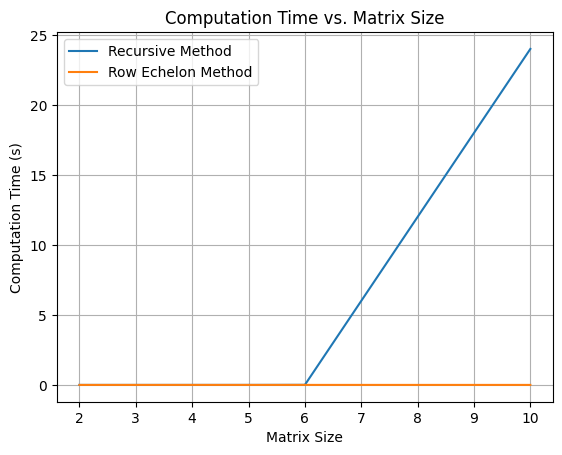

In [ ]:
# Plot the recorded data
"""as you can see the row_echelon algorithm has higher performance for computing determinants of larger matrices."""


# generate a random matrix of given size
def generate_random_matrix(size):
    return np.random.randint(1, 10, size=(size, size))

def measure_time_recursive(size):
    matrix = generate_random_matrix(size)
    start_time = time.time()
    det_recursive(matrix)
    end_time = time.time()
    return end_time - start_time

def measure_time_echelon(size):
    matrix = generate_random_matrix(size)
    start_time = time.time()
    det_row_echelon(matrix)
    end_time = time.time()
    return end_time - start_time

matrix_sizes = [2,3,4,5,6,10]

recursive_times = []
row_echelon_times = []
for size in matrix_sizes:
    recursive_time = measure_time_recursive(size)
    row_echelon_time = measure_time_echelon(size)
    recursive_times.append(recursive_time)
    row_echelon_times.append(row_echelon_time)

# Plot computation time versus matrix size
plt.plot(matrix_sizes, recursive_times, label='Recursive Method')
plt.plot(matrix_sizes, row_echelon_times, label='Row Echelon Method')
plt.xlabel('Matrix Size')
plt.ylabel('Computation Time (s)')
plt.title('Computation Time vs. Matrix Size')
plt.legend()
plt.grid(True)
plt.show()
